In [48]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [49]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the dataset

In [66]:
#Reading the provided dataset
df=pd.read_csv('/content/foodhub_order.csv')

View the first and last 5 rows of the dataset

In [67]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [68]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


**Question 1**: How many rows and columns are present in the data?

In [69]:
#Finding the number of rows and columns
df.shape

(1898, 9)

In [70]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


**Question 2:**What are the datatypes of the different columns in the dataset?

Check the data types of the columns for the dataset

In [71]:
#Finding the datatypes of different columns present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


There are 5 numerical columns in the data and 4 object type columns.

rating column is being read as object type column but it should be in numeric.

In [72]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [73]:
# let's check the data type of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [74]:
# finding the number of missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


There are no missing values in the given dataset.

**Question 4:**Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [75]:
#Checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


minimum, average, and maximum time it takes for food to be prepared once an order is placed are 20, 27.372 and 35 respectively.

**Question 5:**How many orders are not rated?

In [76]:
#Finding the number of orders that are not rated
df['rating'].value_counts()['Not given']

736

736 orders are not rated

Exploratory Data Analysis (EDA)

Univariate Analysis

**Question 6:**Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

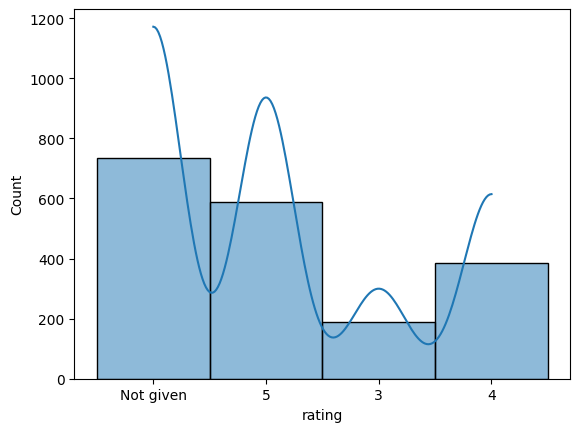

In [77]:
sns.histplot(data=df, x='rating', kde=True);


out of 1898 orders,736 orders are not rated, around 590 orders are rated 5, around 200 orders are rated 3 and around 400 orders orders are rated 4.

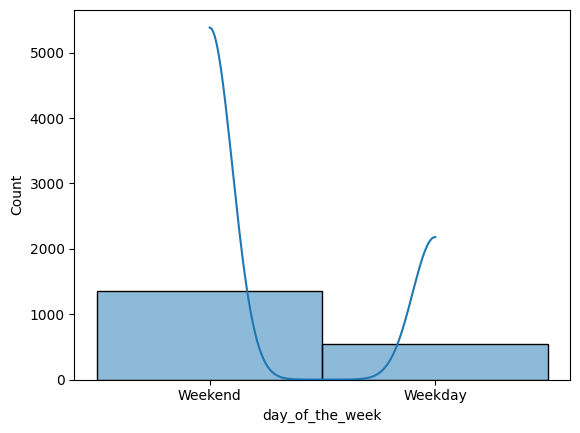

In [78]:
sns.histplot(data=df, x='day_of_the_week', kde=True);

There are more orders in the weekend compared to weekdays.

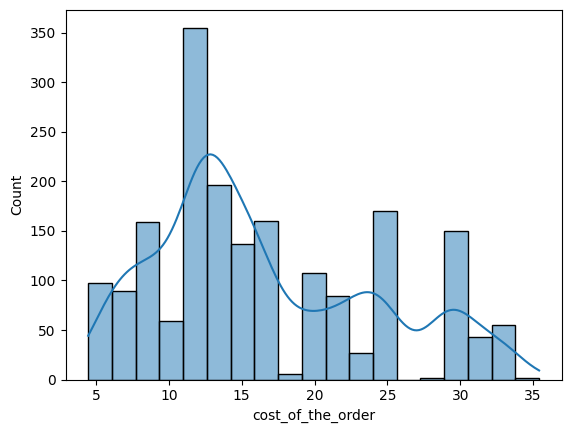

In [79]:
sns.histplot(data=df, x='cost_of_the_order', kde=True);

lowest cost of the orders placed is 5$.

highest cost of the orders placed is 35$.

most of the orders are below 20$.

maximum number of orders are placed with the cost of the order around 12$.

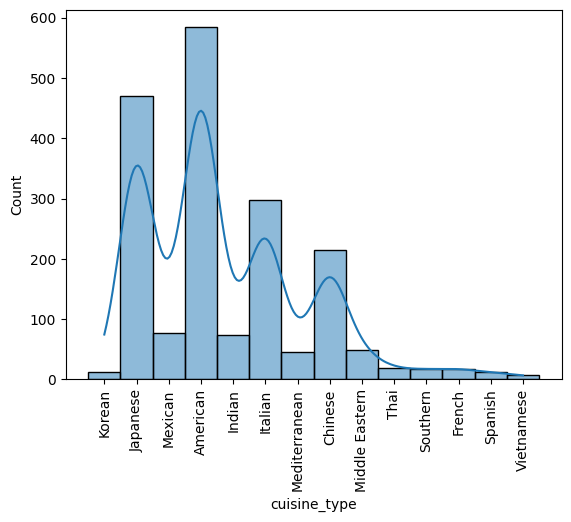

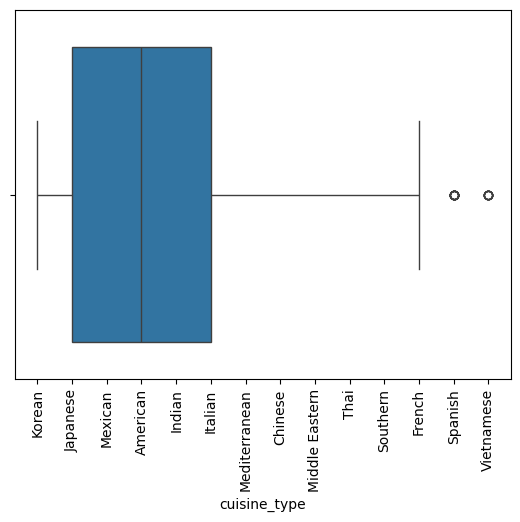

In [80]:
sns.histplot(data=df, x='cuisine_type', kde=True);
plt.xticks(rotation=90);
plt.show()
sns.boxplot(data=df, x='cuisine_type');
plt.xticks(rotation=90);
plt.show()

cuisine type of American is placed highest times, viethnamese placed least times.

after american cuisine type, secondly japanese cuisine type and then thirdly Italian cuisine type are placed highest times.

50% of the orders are of cusion_types Japanese, Mexican, American,Indian and Italian.

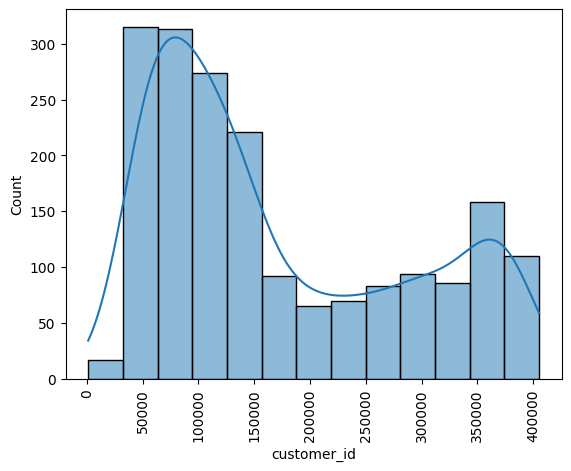

In [81]:
sns.histplot(data=df, x='customer_id', kde=True);
plt.xticks(rotation=90);

most of the orders are from old customers i.e. with customer ids around 35000 to 125000.

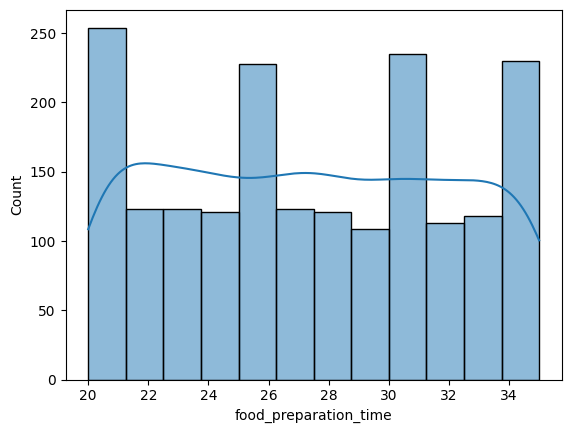

In [82]:
sns.histplot(data=df, x='food_preparation_time', kde=True);
plt.show()

maximim time taken for food preparation is 34 min. minimum time taken for food preparation is 20 min.

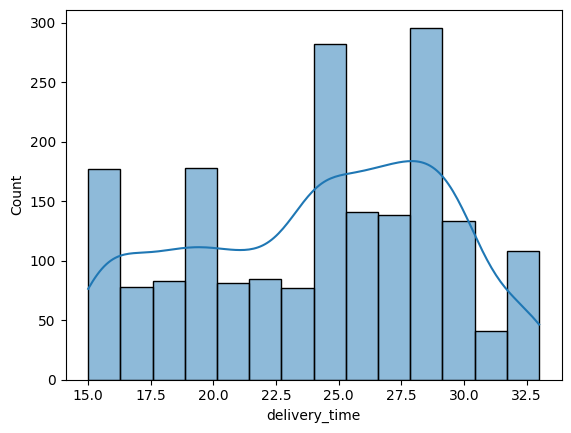

In [83]:
sns.histplot(data=df, x='delivery_time', kde=True);

minimum delivery time is 15 min. maximum delivery time is 32.5 min.

**Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [85]:
#Finding top 5 restaurants in terms of the number of orders received
order_count = df.groupby('restaurant_name').size().reset_index(name='order_count')

In [86]:
sorted_restaurants = order_count.sort_values(by='order_count', ascending=False)

In [87]:
top_5_restaurants = sorted_restaurants.head(5)

In [88]:
print(top_5_restaurants)

               restaurant_name  order_count
136                Shake Shack          219
153          The Meatball Shop          132
21           Blue Ribbon Sushi          119
20   Blue Ribbon Fried Chicken           96
109                       Parm           68


top 5 restaurants in terms of the number of orders received are shake shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, parm.

**Question 8:** Which is the most popular cuisine on weekends?

In [89]:
weekend_orders = df[df['day_of_the_week']=='Weekend']
cuisine_counts = weekend_orders.groupby('cuisine_type').size().reset_index(name='order_count')


In [90]:
sorted_cuisines = cuisine_counts.sort_values(by='order_count', ascending=False)
most_popular_cuisine = sorted_cuisines.head(1)
print(most_popular_cuisine)

  cuisine_type  order_count
0     American          415


most popular cuisine on weekends is American ordered 415 times.

**Question 9:** What percentage of the orders cost more than 20 dollars?

In [91]:
total_orders = len(df)
orders_above_20 = df[df['cost_of_the_order'] > 20]
num_orders_above_20 = len(orders_above_20)
percentage_above_20 = (num_orders_above_20 / total_orders) * 100
print(f"{percentage_above_20:.2f}% of the orders cost more than 20 dollars.")

29.24% of the orders cost more than 20 dollars.


**Question 10:** What is the mean order delivery time?

In [25]:
#Finding the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean delivery time is {mean_delivery_time:.2f} minutes.")


The mean delivery time is 24.16 minutes.


**Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [92]:
customer_order_counts = df.groupby('customer_id').size().reset_index(name='order_count')
sorted_customers = customer_order_counts.sort_values(by='order_count', ascending=False)
top_3_customers = sorted_customers.head(3)
print(top_3_customers)


     customer_id  order_count
116        52832           13
84         47440           10
333        83287            9


Multivariate Analysis

**Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

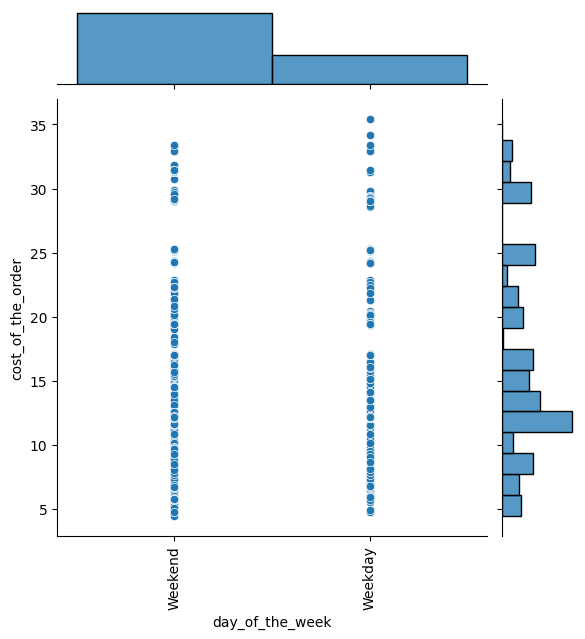

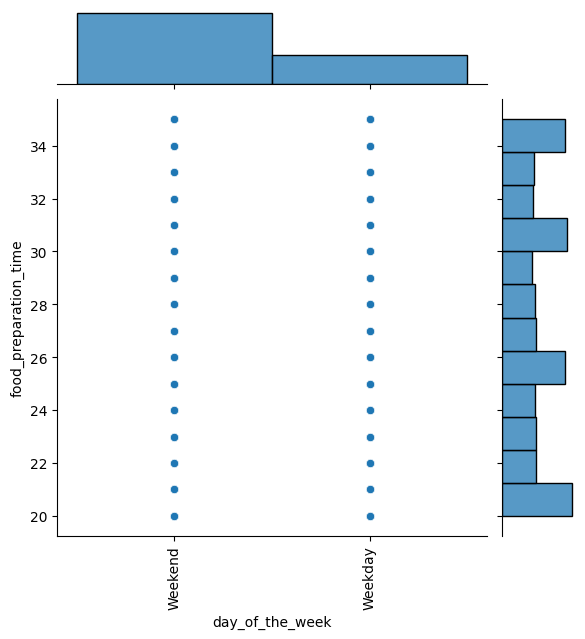

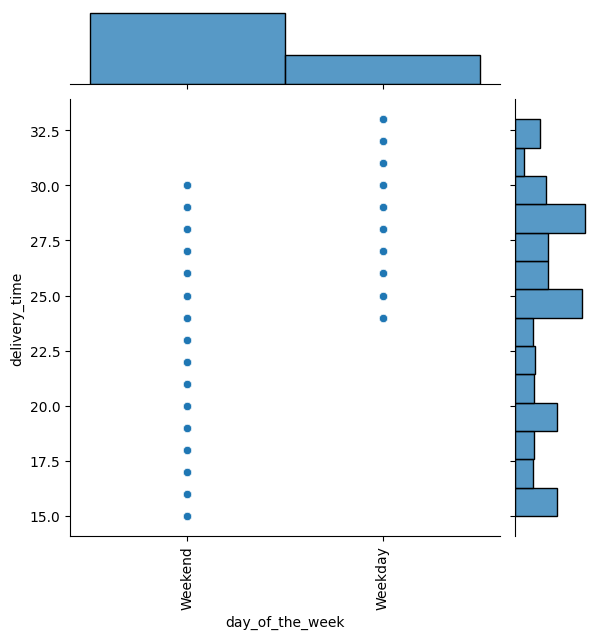

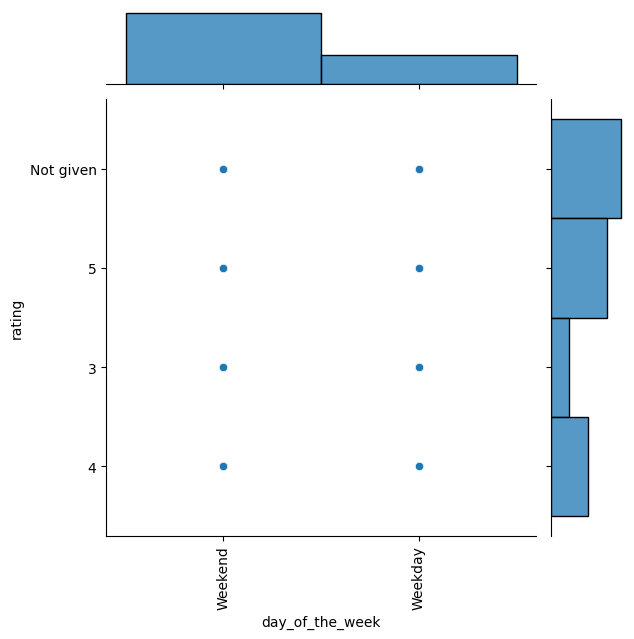

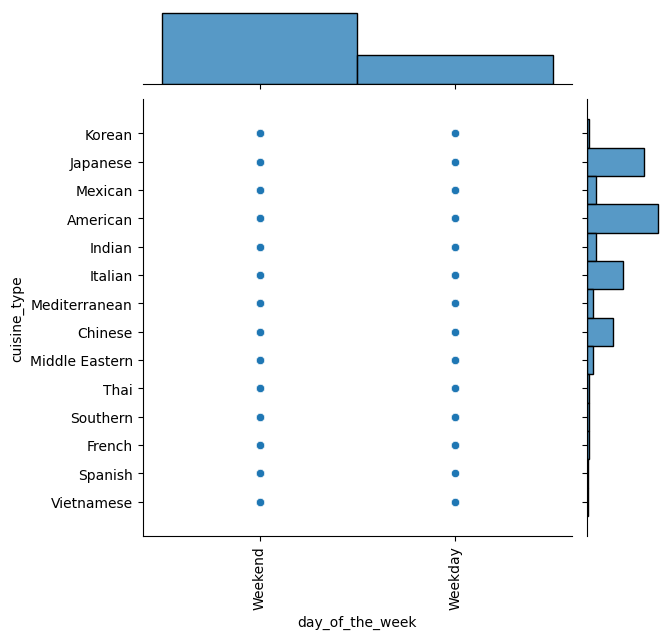

In [93]:
sns.jointplot(data=df, x='day_of_the_week', y='cost_of_the_order');
plt.xticks(rotation=90);
plt.show();
sns.jointplot(data=df, x='day_of_the_week', y='food_preparation_time');
plt.xticks(rotation=90);
plt.show();
sns.jointplot(data=df, x='day_of_the_week', y='delivery_time');
plt.xticks(rotation=90);
plt.show();
sns.jointplot(data=df, x='day_of_the_week', y='rating');
plt.xticks(rotation=90);
plt.show();
sns.jointplot(data=df, x='day_of_the_week', y='cuisine_type');
plt.xticks(rotation=90);
plt.show();

Food preparation time,delivery time, cost of the order and rating are more in weekends compared to weekdays.

**Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [94]:
#replacing Not given values in dataset with nan
df['rating']=df['rating'].replace(['Not given'],np.nan)

#changing the datatype to float
df['rating']=df['rating'].astype('float')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [96]:
restaurant_ratings = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),         # Count the number of ratings
    average_rating=('rating', 'mean')         # Calculate the average rating
).reset_index()
# Filter restaurants with rating count > 50 and average rating > 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) &
                                          (restaurant_ratings['average_rating'] > 4)]

# Display the eligible restaurants
print(eligible_restaurants)


               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64           4.328
21           Blue Ribbon Sushi            73           4.219
136                Shake Shack           133           4.278
153          The Meatball Shop            84           4.512


The restaurants fulfilling the criteria to get the promotional offerBlue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.


**Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [97]:
# Apply the company charges based on order cost
df['company_revenue'] = df['cost_of_the_order'].apply(
    lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0)
)

# Calculating the total revenue generated by the company
total_revenue = df['company_revenue'].sum()

print("Net revenue generated by the company:", total_revenue)

Net revenue generated by the company: 6166.303


**Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [104]:
# Calculate the total time required for each order (food preparation + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the total time required for each order (food preparation + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60 = (orders_above_60 / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


**Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [105]:
# Calculate mean delivery time for Weekdays
mean_delivery_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate mean delivery time for Weekends
mean_delivery_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Display the results
print(f"Mean delivery time during weekdays: {mean_delivery_weekdays:.2f} minutes")
print(f"Mean delivery time during weekends: {mean_delivery_weekends:.2f} minutes")

Mean delivery time during weekdays: 28.34 minutes
Mean delivery time during weekends: 22.47 minutes


**Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

#conclusions



1.   number of orders in the weekend are more compared to weekdays.
2.   out of 1898 orders, 736 orders are not rated.
3.   lowest cost of the orders placed is 5$.

4.   highest cost of the orders placed is 35$.

5.   most of the orders are below 20$.

6.   cuisine type of American is placed highest times, after american cuisine type, secondly japanese cuisine type and then thirdly Italian cuisine type are placed highest times.


7. viethnamese cuisine type is placed least times.

8. Shake Shack restaurant has highest rating cunt 133.
9. The Meatball Shop restaurant has highest average rating 4.512.
10.top 3 most frequent customers are with customer ids  52832, 47440,   83287.



#Recommendations
1. Restaurants should focus more on weekend orders.
2. Resurants shoud give more focus on American, Japanese and Italian cusion types.
3. Investment and focus on this cuisine type should be avoided.
4. The comapny should focus more on Blue Ribbon Fried Chicken, Blue Ribbon Sushi,ShakeShack,   The Meatball Shop restaurants.